# Classification model using KNN

### 1. Import libraries

In [17]:
import pandas as pd
from sklearn import neighbors
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from scipy.spatial import distance
from sklearn import model_selection

### 2. Upload Clinic data

In [18]:
path ="../../../../Data_preprocessing/RNA_post_autoencoder/encoded_data_multiclass_43.csv"
data = pd.read_csv(path)
data.reset_index
data.round(4)
data=data.iloc[:,1:440  ] 
data.head()

,Target,0,1,2,3,4,5,6,7,8,...,33,34,35,36,37,38,39,40,41,42
0,2,-0.366403,-0.529891,1.224275,-0.170353,2.797608,-2.960380,0.503309,2.175944,1.066994,...,2.206299,-0.502463,-2.004801,-0.438421,0.785737,-1.988872,-0.893650,1.528710,3.073825,1.899409
1,1,-0.022685,-0.080576,1.521277,0.333096,2.073513,-2.504466,0.212547,1.684705,0.283884,...,1.657404,-0.800799,-1.176540,-0.398753,0.854077,-1.421040,-0.487865,1.479854,2.290627,1.117899
2,2,-0.052578,-0.362782,1.127761,-0.077959,2.745393,-3.656872,0.171195,2.509113,0.844297,...,2.001973,-0.640431,-2.522731,-0.346004,0.709842,-1.786768,-0.986672,1.240316,3.191606,2.450312
3,0,-0.095125,-0.152655,1.517417,0.131297,2.404263,-2.807642,0.213807,2.105238,0.445960,...,1.930249,-0.709466,-1.687836,-0.319494,0.988847,-1.690042,-0.947813,1.495447,2.861046,1.617567
4,1,0.172483,-0.599030,1.382951,-0.103038,2.338006,-2.988720,0.623872,2.488591,0.634746,...,1.437723,-0.653985,-2.120162,-0.160325,0.505564,-1.804533,-0.608725,1.377656,2.063588,1.264385


In [19]:
Y = data.Target # Target column

X = data.iloc[:,1:439] # I selected all the columns by removing the Unnamed column (row id) and the Target column.


print(X)
print('Numero de pacientes: ',len(Y))

            0         1         2         3         4         5         6  \
0   -0.366403 -0.529891  1.224275 -0.170353  2.797608 -2.960380  0.503309   
1   -0.022685 -0.080576  1.521277  0.333096  2.073513 -2.504466  0.212547   
2   -0.052578 -0.362782  1.127761 -0.077959  2.745393 -3.656872  0.171195   
3   -0.095125 -0.152655  1.517417  0.131297  2.404263 -2.807642  0.213807   
4    0.172483 -0.599030  1.382951 -0.103038  2.338006 -2.988720  0.623872   
..        ...       ...       ...       ...       ...       ...       ...   
176 -0.038708 -0.484153  1.432885  0.085147  2.330397 -2.537074  0.430618   
177 -0.067312 -0.207609  1.119932 -0.150279  2.498550 -3.748665  0.099322   
178  0.037973 -0.539611  1.428888 -0.079274  2.637841 -3.243155  0.248875   
179 -0.066098 -0.426008  1.787303  0.068520  2.061454 -1.809541  0.379197   
180 -0.103007 -0.591417  0.982493 -0.205921  2.387277 -3.304925  0.182727   

            7         8         9  ...        33        34        35  \
0  

### 3. Train-Test dataset split

In [20]:
XTrain, XTest, yTrain, yTest = train_test_split(X, Y, test_size=0.20, random_state=125,stratify=Y)
yTrain=yTrain.to_numpy()
yTest=yTest.to_numpy()
print('Training set size:', len(XTrain))
print('Target column size of the training set:', len(yTrain))
print('Test set size:', len(XTest))
print('Target column size of the test set:', len(yTest))

Training set size: 144
Target column size of the training set: 144
Test set size: 37
Target column size of the test set: 37


### 4. Study the best value for K

In [21]:
neighbors = list(range(1,8))
cek = []
list_accuracy = []
best_acuracy = 0
best_k = 0
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    pred = knn.fit(XTrain, yTrain).predict(XTest)
    if accuracy_score(yTest, pred) >= best_acuracy:
        best_k = k
        best_acuracy=accuracy_score(yTest, pred)
    list_accuracy.append(accuracy_score(yTest, pred))

print("Best accuracy is obtained with k = " + str(best_k)+ " and is: %.4f" % (best_acuracy))


Best accuracy is obtained with k = 5 and is: 0.4324


C:\Users\sandr\AppData\Local\Temp/ipykernel_17260/3738168230.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(np.append(np.roll(list_accuracy,1),list_accuracy[6]),'ro', color='r', linestyle='dashed',linewidth=1.0, label="Graph2")
C:\Users\sandr\AppData\Local\Temp/ipykernel_17260/3738168230.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(best_k, best_acuracy, 'ro', color ='g')


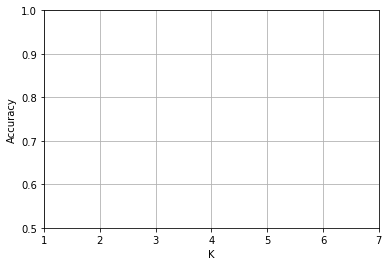

In [22]:
plt.plot(np.append(np.roll(list_accuracy,1),list_accuracy[6]),'ro', color='r', linestyle='dashed',linewidth=1.0, label="Graph2")
# Green dot represent best K value
plt.plot(best_k, best_acuracy, 'ro', color ='g')
plt.axis([1, 7, 0.5, 1])
plt.xlabel('K')
plt.ylabel('Accuracy')

plt.grid()
plt.show()

### 5. Best metric study (manhattan or euclidean)

In [23]:
from sklearn import neighbors
# Euclidean distance model
euclid_model = KNeighborsClassifier(n_neighbors=best_k, metric=distance.sqeuclidean)
euclid_model.fit(XTrain,yTrain) 

# Manhattan distance model
manhattan_model = KNeighborsClassifier(n_neighbors=best_k, metric=distance.cityblock) 
manhattan_model.fit(XTrain, yTrain)

KNeighborsClassifier(metric=<function cityblock at 0x00000237D400C280>)

In [24]:
manhattan_predictions = manhattan_model.predict(XTest)
euclid_predictions = euclid_model.predict(XTest) 
df = pd.DataFrame({'actual': yTest, 'manhattan': manhattan_predictions, 'euclid': euclid_predictions})
df.head()

,actual,manhattan,euclid
0,0,0,0
1,1,0,1
2,0,0,0
3,2,0,0
4,0,0,0


In [25]:
result1= model_selection.cross_val_score(euclid_model, XTrain, yTrain, cv=5, scoring='accuracy')
result2 = model_selection.cross_val_score(manhattan_model, XTrain, yTrain, cv=5, scoring='accuracy')
print("Best result of the cross validation of the model (euclidean) with the best paramters:" +str(np.mean(result1)))
print("Best result of the cross validation of the model (manhattan) with the best paramters:" +str(np.mean(result2)))

Best result of the cross validation of the model (euclidean) with the best paramters:0.43103448275862066
Best result of the cross validation of the model (manhattan) with the best paramters:0.4100985221674877


#### 6.1. Manhattan model

In [26]:
# Making predictions with the optimal model on the training dataset
yhatTrain = manhattan_model.predict(XTrain)
contTrain = 0

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(yTrain),1) :
    if (yhatTrain[i] == yTrain[i]):
        contTrain = contTrain + 1

In [27]:
# Making predictions with the optimal model on the test dataset
mayhatTest = manhattan_model.predict(XTest)
contTest = 0

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(yTest),1) :
    if (mayhatTest[i] == yTest[i]):
        contTest = contTest + 1

In [28]:
print('Precisión final en el conjunto de datos de entrenamiento (manhattan): ' + str(contTrain/len(yTrain)))
print('Precisión final en el conjunto de datos de prueba (manhattan): ' + str(contTest/len(yTest)))

Precisión final en el conjunto de datos de entrenamiento (manhattan): 0.5972222222222222
Precisión final en el conjunto de datos de prueba (manhattan): 0.3783783783783784


In [29]:
from sklearn.metrics import classification_report,confusion_matrix

print('----------------Confusion Matrix (Training)------------------')
print(confusion_matrix(yTrain,yhatTrain))
print('Input data:  ' + str(np.array(yTrain)))
print('Prediction:        ' +str(yhatTrain))

----------------Confusion Matrix (Training)------------------
[[51  4 12]
 [13 10  2]
 [18  9 25]]
Input data:  [1 0 2 0 2 2 0 0 2 0 2 0 1 0 2 2 0 2 2 2 0 0 0 2 0 0 0 0 1 1 2 2 2 2 0 1 2
 0 0 2 1 2 2 1 0 0 2 2 1 0 0 0 2 0 0 2 0 2 1 2 0 2 1 0 0 0 0 2 2 2 0 2 0 0
 0 2 0 2 0 0 0 1 2 0 0 1 2 2 1 1 0 2 0 2 0 0 1 0 1 0 0 2 0 0 2 2 2 1 0 2 2
 1 2 0 1 0 0 0 2 0 1 0 2 0 0 2 1 1 0 0 0 2 0 1 0 0 0 2 2 2 1 2 0 1]
Prediction:        [0 0 0 0 2 2 0 0 0 0 2 1 0 0 1 1 0 0 2 2 2 0 0 2 0 0 0 0 0 0 1 2 0 0 2 1 2
 2 0 0 0 0 2 0 2 0 1 0 1 0 2 1 2 0 0 0 1 1 1 2 0 0 1 2 0 0 0 2 2 2 2 0 1 0
 0 2 0 2 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 2 2 2 0 0 0 0 0 0 0 0 1 1 2 1 0 2 2
 2 2 0 0 0 0 0 0 2 1 0 1 0 0 2 1 0 0 0 2 0 0 0 0 2 0 2 2 2 0 0 0 2]


In [30]:
print(classification_report(yTrain,yhatTrain))

              precision    recall  f1-score   support

           0       0.62      0.76      0.68        67
           1       0.43      0.40      0.42        25
           2       0.64      0.48      0.55        52

    accuracy                           0.60       144
   macro avg       0.57      0.55      0.55       144
weighted avg       0.60      0.60      0.59       144



In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(yTest, mayhatTest)
print('----------------Confusion Matrix (Test)------------------')
print(confusion_matrix)
print('Input data:  ' + str(np.array(yTest)))
print('Prediction:        ' +str(mayhatTest))

----------------Confusion Matrix (Test)------------------
[[10  4  4]
 [ 5  0  1]
 [ 8  1  4]]
Input data:  [0 1 0 2 0 2 1 0 1 0 2 2 1 2 2 0 1 2 0 0 0 2 1 0 0 2 0 2 2 0 0 0 2 2 0 0 0]
Prediction:        [0 0 0 0 0 2 2 2 0 1 0 1 0 2 2 1 0 2 0 1 2 0 0 0 1 0 0 0 0 2 0 0 0 0 2 0 0]


In [32]:
print(classification_report(yTest, mayhatTest))

              precision    recall  f1-score   support

           0       0.43      0.56      0.49        18
           1       0.00      0.00      0.00         6
           2       0.44      0.31      0.36        13

    accuracy                           0.38        37
   macro avg       0.29      0.29      0.28        37
weighted avg       0.37      0.38      0.37        37

